**Face Recognition Using CNN Architecture in Python**

Convolutional Neural Networks(CNN) has changed the way we used to learn images. CNN mimics the way humans see images, by focussing on one portion of the image at a time and scanning the whole image, this is called covolution operation.

CNN boils down every image as a vector of numbers, which can be learned by the fully connected Dense layers of ANN.

**In this perticular case study I will be performing how to implement a face recognition model using CNN. You can use this template to create an image classification model on any group of images by putting them in a folder and creating a class.**

**About the Dataset (Images)**

The data contains cropped face images of 16 people divided into Training and testing. We will train the CNN model using the images in the Training folder and then test the model by using the unseen images from the testing folder, to check if the model is able to recognise the face number i.e label given to each face during training of the unseen images or not.

In [1]:
# import libraries
import tensorflow
from tensorflow import keras

**Image Agumentation with Preprocessing**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_images = "/content/drive/MyDrive/Face Images/Final Training Images"


In [5]:
## Image Preprocessing using keras


# As we know deep-learning is hungry for data, the data we have is only limited.
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from tensorflow.keras.preprocessing.image import ImageDataGenerator # create many variations of an image.
train_gen = ImageDataGenerator(
    shear_range=0.1, #tilting
    zoom_range=0.1,
    horizontal_flip=True
)

In [6]:
# No transformations are made on the test data
test_gen = ImageDataGenerator()

In [7]:
# Generating training data
training_data = train_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)


Found 244 images belonging to 16 classes.


In [8]:
# generating test data
testing_data = test_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)


Found 244 images belonging to 16 classes.


In [9]:
# Printing class labels for each face
testing_data.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

**If you observe, the above dictionary is having keys as face_names and values as numbers. We need to swap them because the classifier model will return the answer as the numeric mapping and we need to get the face_name out of it.**

Also, since this is a multi-class classification problem, we are counting the number of unique faces, as that will be used as the number of output neurons in the output layer of fully connected ANN classifier.

**Mapping of class_labels with numeric value for classification**

In [10]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag


# use pickle to save the mapping's
import pickle
with open('/content/drive/MyDrive/Face Images/FinalMap.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [11]:
print("Mapping of Face and its numeric value",Result_class)

Mapping of Face and its numeric value {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}


In [12]:
Output_Neurons=len(Result_class)
print('\n The Number of output neurons: ', Output_Neurons)


 The Number of output neurons:  16


**Building the CNN Architecture, Model Compilation and Training**

In the below code snippet, I have created a CNN model with

* hidden layers of convolution
* hidden layers of max pooling
* layer of flattening
* Hidden ANN layer
* output layer with 16-neurons (one for each face)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [15]:
'''Initializing the Convolutional Neural Network'''
Model = Sequential()


''' Convolution
# Adding the first layer of CNN
# we are using the format (100,100,3) because we are using TensorFlow backend
# It means 3 matrix of size (100x100) pixels representing Red, Green and Blue components of pixels
'''

Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))

'''# Maxplooing layer'''

Model.add(MaxPool2D(pool_size=(2,2)))

'''Adding additional layers  of convolution and
        maxpooling for better model accuracy and performance'''

Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

'''# Add a flatten layer to convert the vector to one dimensional'''
Model.add(Flatten())

'''Add dense layers and Initialize weights using
                kernal initializer for better learing of image features and classification'''

Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))

'''Perform Model Compilation'''

Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])


'''# Using Early stopping to reduce the training time'''

from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

import time
# Measuring the time taken by the model to train
StartTime=time.time()

'''# Model Training'''
Model.fit(training_data,
          epochs = 30,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 78s 9s/step - Accuracy: 0.0539 - loss: 396.9370 - val_Accuracy: 0.0779 - val_loss: 63.8939
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - Accuracy: 0.0932 - loss: 39.8363 - val_Accuracy: 0.2295 - val_loss: 4.6619
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - Accuracy: 0.0789 - loss: 3.9293 - val_Accuracy: 0.1803 - val_loss: 2.3921
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 401ms/step - Accuracy: 0.2020 - loss: 2.4876 - val_Accuracy: 0.4713 - val_loss: 1.7361
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 484ms/step - Accuracy: 0.4072 - loss: 1.7528 - val_Accuracy: 0.7746 - val_loss: 0.9410
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 404ms/step - Accuracy: 0.6945 - loss: 1.0694 - val_Accuracy: 0.8689 - val_loss: 0.4310
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 393ms/step - Accuracy: 0.8477 - loss: 0.5495 - val_Accuracy: 0.9549 - val_loss: 0.1388
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - Accuracy: 0.8671 - loss: 0.4623 - val_Accuracy: 0.9877 - val_los

**Using the Classifier to make predictions on unseen test images**

In [33]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [34]:
# Path to the folder containing test images
test_images_path = "/content/drive/MyDrive/Face Images/Final Testing Images"

In [35]:
# Load the mapping of class labels to names
with open('/content/drive/MyDrive/Face Images/FinalMap.pkl', 'rb') as Final_mapping:
    Result_class = pickle.load(Final_mapping)


In [36]:
'''########### Making single predictions ###########'''

ImagePath="/content/drive/MyDrive/Face Images/Final Testing Images/face10/1face10.jpg"
test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=Model.predict(test_image,verbose=0)
#print(training_set.class_indices)

print('####'*10)
print('Prediction is: ',Result_class[np.argmax(result)])

########################################
Prediction is:  face10


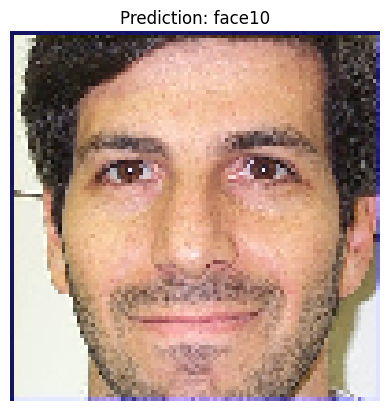

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Load the mapping of class labels to names
with open('/content/drive/MyDrive/Face Images/FinalMap.pkl', 'rb') as Final_mapping:
    Result_class = pickle.load(Final_mapping)

# Path to the image
ImagePath = "/content/drive/MyDrive/Face Images/Final Testing Images/face10/1face10.jpg"

# Load and preprocess the image
test_image = image.load_img(ImagePath, target_size=(100, 100))
test_image_array = image.img_to_array(test_image)  # Keep original image for display
test_image_array = np.expand_dims(test_image_array, axis=0)

# Make prediction
result = Model.predict(test_image_array, verbose=0)
predicted_label = Result_class[np.argmax(result)]

# Display the image and prediction
plt.imshow(test_image)  # Display the actual image
plt.title(f"Prediction: {predicted_label}")  # Set title with prediction
plt.axis('off')  # Hide axes
plt.show()

In [28]:
import numpy as np
from keras.preprocessing import image
import os
import glob
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Path to the folder containing test images
test_images_path = "/content/drive/MyDrive/Face Images/Final Testing Images"

# Load the mapping of class labels to names
with open('/content/drive/MyDrive/Face Images/FinalMap.pkl', 'rb') as Final_mapping:
    Result_class = pickle.load(Final_mapping)

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []

## Loading all the image paths from final testing folder for prediction
main_ = "/content/drive/MyDrive/Face Images/Final Testing Images"
img_paths = glob.glob(os.path.join(main_, '**', '*.jpg'))

for path in img_paths:
    # Extract true label from image path (assuming folder structure represents labels)
    true_label = os.path.basename(os.path.dirname(path))
    y_true.append(true_label)

    # Load and preprocess image
    test_image = image.load_img(path, target_size=(100, 100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make prediction
    result = Model.predict(test_image, verbose=0)
    predicted_label = Result_class[np.argmax(result)]
    y_pred.append(predicted_label)

# Calculate and print metrics
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9844
Precision: 0.9875
Recall: 0.9844
F1-score: 0.9841
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


<Axes: >

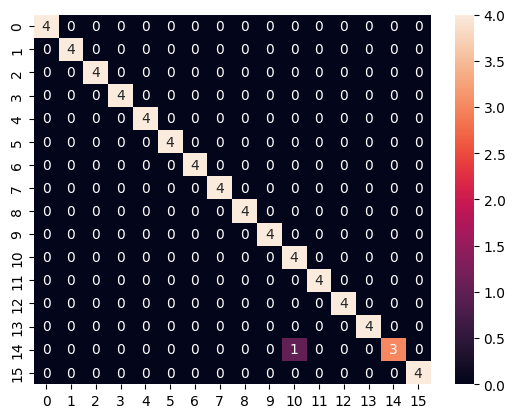

In [26]:
import seaborn as sns
sns.heatmap(cm, annot=True)